The objective of this task is to detect hate speech in tweets.Here we classify the hate speech if it has racist or sexist sentiment associated with it.So we classify this tweets from other tweets.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv(r"C:\Users\tejas\Downloads\Twitter Sentiments.csv.zip")

In [12]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


PREPROCESSING

In [14]:
# Remove the pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word, "",input_txt)
    return input_txt

In [16]:
#Remove the twitter handles(@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet'],"@[\w]*")

In [17]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
#Remove special characters
data['clean_tweet'] = data['clean_tweet'].str.replace("a-zA-Z#]"," ")
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [22]:
#Remove short words
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [24]:
#Tokenize the tweet
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [26]:
#Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [27]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

data['clean_tweet'] = tokenized_tweet
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


EXPLORATORY DATA ANALYSIS

In [31]:
!pip install wordcloud

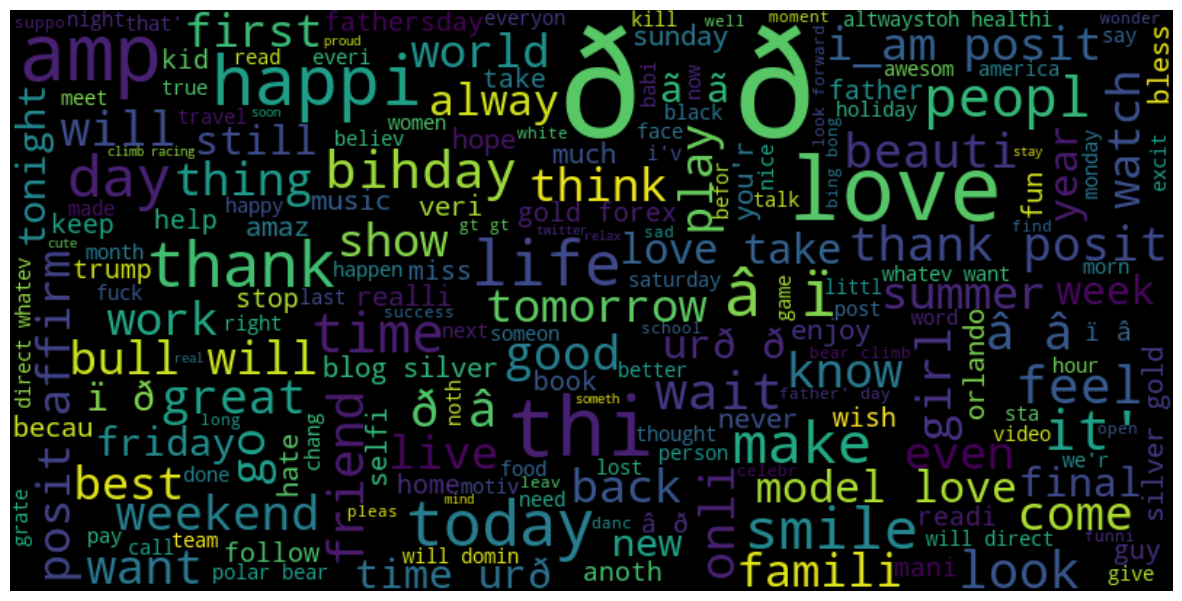

In [37]:
#Display frequent words
all_words = " ".join([sentence for sentence in data['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height= 400,random_state = 42,max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


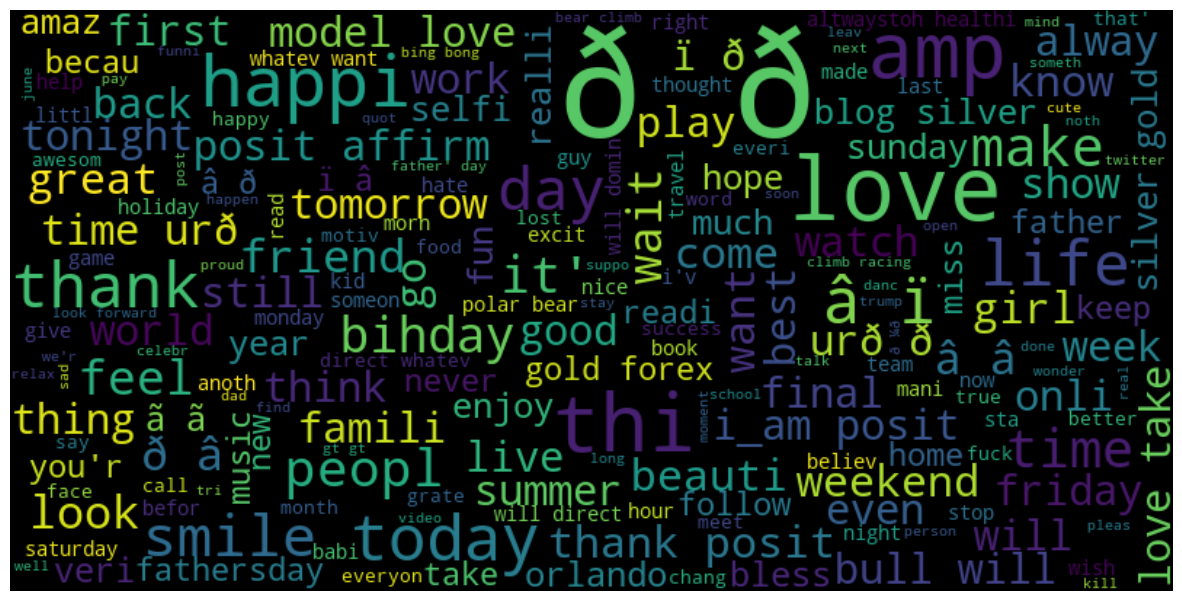

In [39]:
#Display words for positive tweets
all_words = " ".join([sentence for sentence in data['clean_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height= 400,random_state = 42,max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

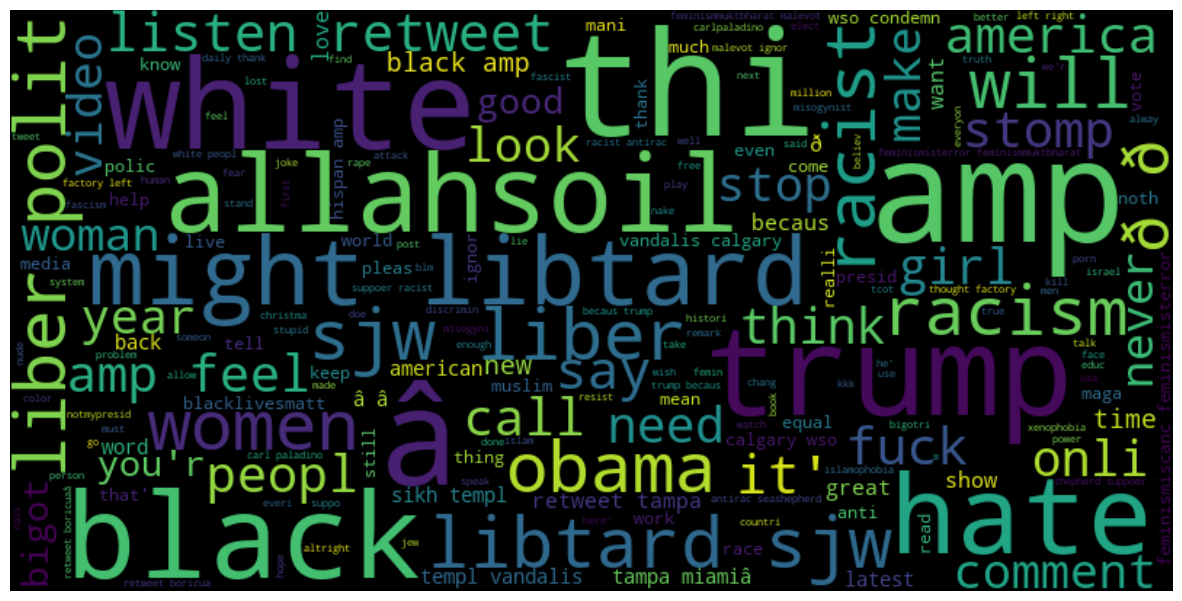

In [40]:
#Display words for negative tweets
all_words = " ".join([sentence for sentence in data['clean_tweet'][df['label']==1]])
wordcloud = WordCloud(width=800, height= 400,random_state = 42,max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [70]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [71]:
#extraxt hashtags from harsh tweets
ht_positive = hashtag_extract(data['clean_tweet'][data['label']==0])

In [72]:
ht_negative = hashtag_extract(data['clean_tweet'][data['label']==1])

In [73]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [74]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])


In [75]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [76]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


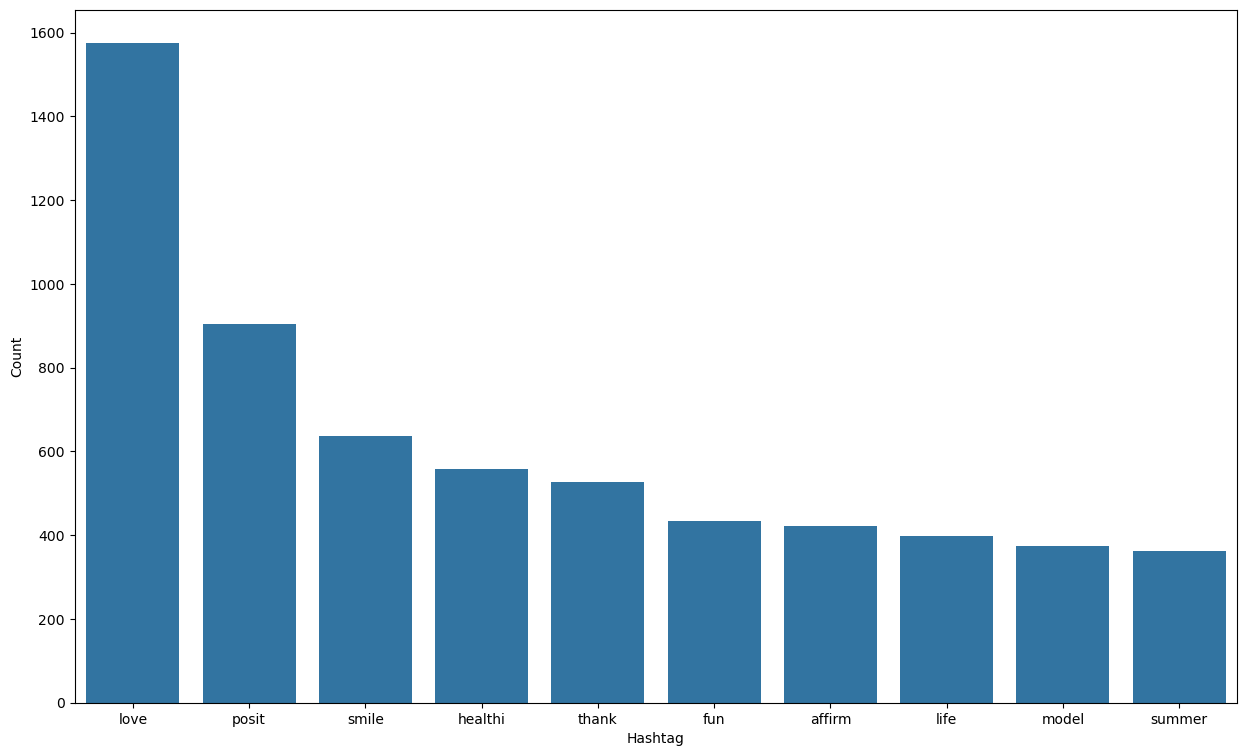

In [79]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [80]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


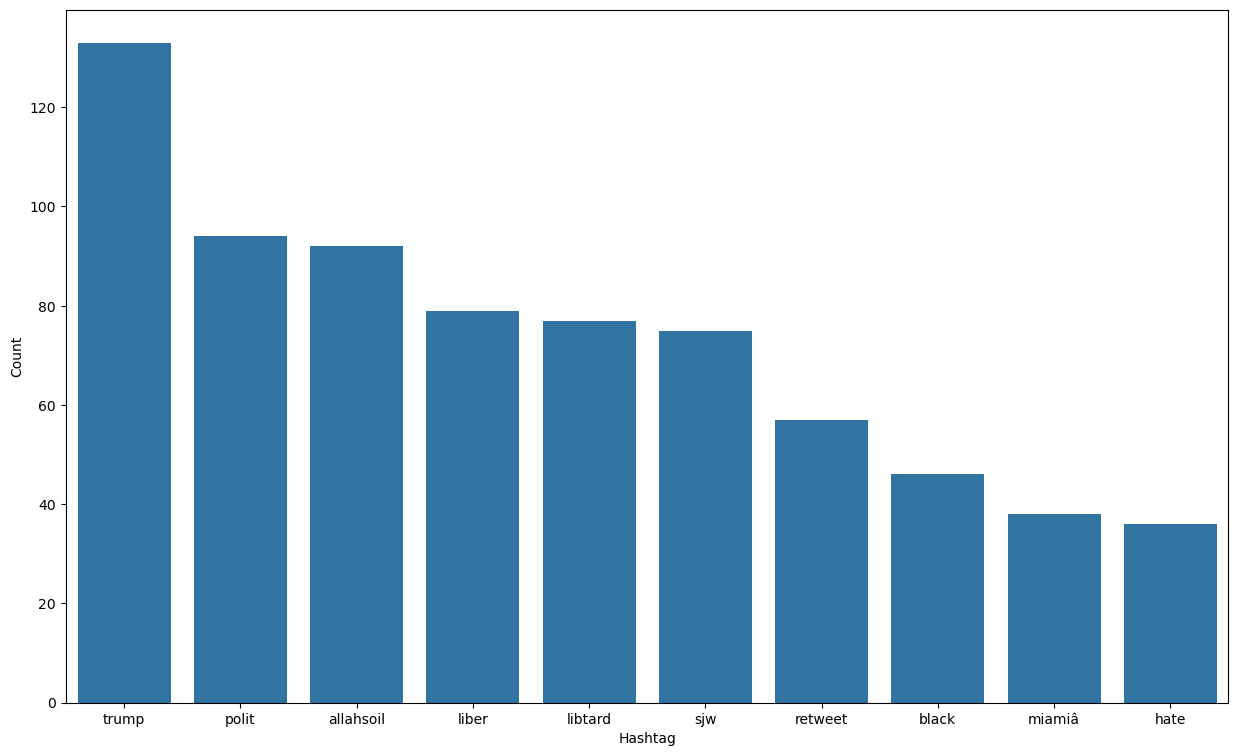

In [81]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

INPUT SPLIT

FEATURE EXTRACTION

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(data['clean_tweet'])

In [85]:
#bow[0].toarray()

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

MODEL TRAINING

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [92]:
pred=model.predict(x_test)
f1_score(y_test,pred)

0.506508875739645

In [93]:
accuracy_score(y_test,pred)

0.9478162933299963

In [95]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >=0.3
pred = pred.astype(int)
f1_score(y_test, pred)

0.5575992255566312

In [96]:
accuracy_score(y_test,pred)

0.9428106619947441

In [ ]:
pred_prob